In [70]:
from ValueIteration import value_iteration
import matplotlib.pyplot as plt
import math

# Implementing Value Iteration to solve 2-echelon inventory optimisation MDP with no lead times

In [81]:

def create_P(demand_distribution):
    def prob_trans(s, a, sp):
        demand = s + a - sp
        return demand_distribution.get(demand, 0)

    return prob_trans

def create_R(demand_distribution, hold_cost, backlog_cost, order_cost):
    def cost_function(s, a):
        holding_cost = hold_cost*(sum(max(s + a - dt, 0)*prob for dt, prob in demand_distribution.items()))
        backlogged_cost = backlog_cost*(sum(max(dt - s - a, 0)*prob for dt, prob in demand_distribution.items()))
        ordering_cost = order_cost*a

        return holding_cost + backlogged_cost + ordering_cost
    
    return cost_function


def value_update_func(capacity):
    def bellman_eq_no_lead(s, S, A, P, R, gamma, Vk):
        values = dict((a, 0) for a in A if s+a <= capacity) # value function at s for each action
        # print(s, values.keys())
        for a in values.keys():
            values[a] = R(s, a) + gamma*sum([P(s, a, sp)*Vk[sp] for sp in S])
        # print(values)
        return values
    return bellman_eq_no_lead




In [77]:

capacity = 100
S = set(range(-capacity, capacity+1))
A = set(range(math.ceil(capacity/2)+1))
demand_dist = {0: 0.2, 10: 0.6, 20: 0.2}
ch = 10
cb = 100
cs = 30
P = create_P(demand_dist)
R = create_R(demand_dist, ch, cb, cs)
V_init = dict([(s, 0) for s in S])    # initial probability of winning at all states is 0
gamma=1
bellman_eq_no_lead = value_update_func(capacity)

results = value_iteration(S=S, A=A, P=P, R=R, gamma=gamma, max_iterations=1000, 
                          bellman_eq=bellman_eq_no_lead, V_init=V_init, theta=1e-7)    



0 dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
{0: 1000.0, 1: 951.9999999999999, 2: 904.0, 3: 856.0, 4: 808.0, 5: 760.0, 6: 712.0, 7: 664.0, 8: 616.0, 9: 568.0, 10: 520.0, 11: 538.0, 12: 556.0, 13: 574.0, 14: 592.0, 15: 610.0, 16: 628.0, 17: 646.0, 18: 664.0, 19: 682.0, 20: 700.0, 21: 740.0, 22: 780.0, 23: 820.0, 24: 860.0, 25: 900.0, 26: 940.0, 27: 980.0, 28: 1020.0, 29: 1060.0, 30: 1100.0, 31: 1140.0, 32: 1180.0, 33: 1220.0, 34: 1260.0, 35: 1300.0, 36: 1340.0, 37: 1380.0, 38: 1420.0, 39: 1460.0, 40: 1500.0, 41: 1540.0, 42: 1580.0, 43: 1620.0, 44: 1660.0, 45: 1700.0, 46: 1740.0, 47: 1780.0, 48: 1820.0, 49: 1860.0, 50: 1900.0}
1 dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5

In [78]:
optimal_policy = results["optimal_policy"]
cost_function = results["value_function"]


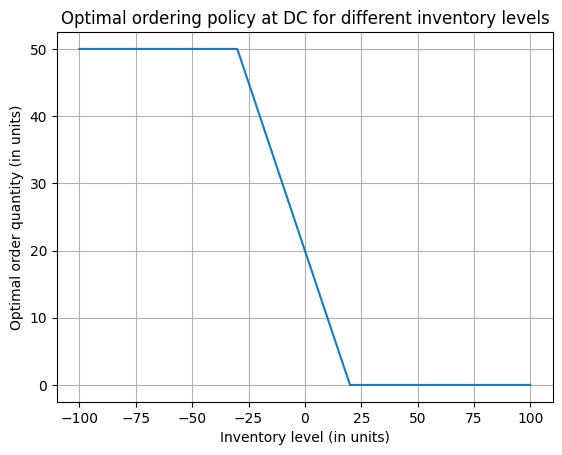

In [79]:
plt.plot(*zip(*sorted(optimal_policy.items())))
plt.title("Optimal ordering policy at DC for different inventory levels")
plt.xlabel("Inventory level (in units)")
plt.ylabel("Optimal order quantity (in units)")
plt.grid()
plt.show()

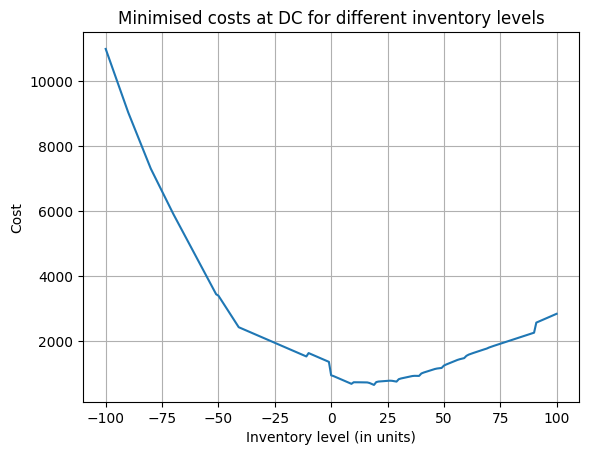

In [80]:
plt.plot(*zip(*sorted(cost_function.items())))
plt.title("Minimised costs at DC for different inventory levels")
plt.xlabel("Inventory level (in units)")
plt.ylabel("Cost")
plt.grid()
plt.show()

# Implementing Value Iteration to solve 2-echelon inventory optimisation MDP with lead times